# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz

In [2]:
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

# Linear bias calculation

Here we compare the high-precision cl^kk emulators (`lCl`) from `class` to the Limber integral for lensing using Pk non-linear high-precision emulator (`lens_lens_hf`) computed by `classy_sz`.

In [36]:
%%time
cosmo = Class_sz()

cosmo.set(cosmo_params)
cosmo.set({
'output': 'lCl,lens_lens_hf',

'ell_max': 60000.0,
'ell_min': 2.0,
'dlogell': 0.1,
'dell': 0,



'z_min':1e-5,
'z_max': 35.,
    
'k_min_for_pk_class_sz' : 1e-4,
'k_max_for_pk_class_sz' : 5e1,
'k_per_decade_class_sz' : 200.,
'P_k_max_h/Mpc' : 200.0,

'redshift_epsrel': 0.00001,


'non_linear':'halofit',


'cosmo_model':0,


})
cosmo.compute_class_szfast()
cl_kk_hm = cosmo.cl_kk

CPU times: user 11.9 s, sys: 477 ms, total: 12.4 s
Wall time: 1.49 s


(1e-10, 3e-07)

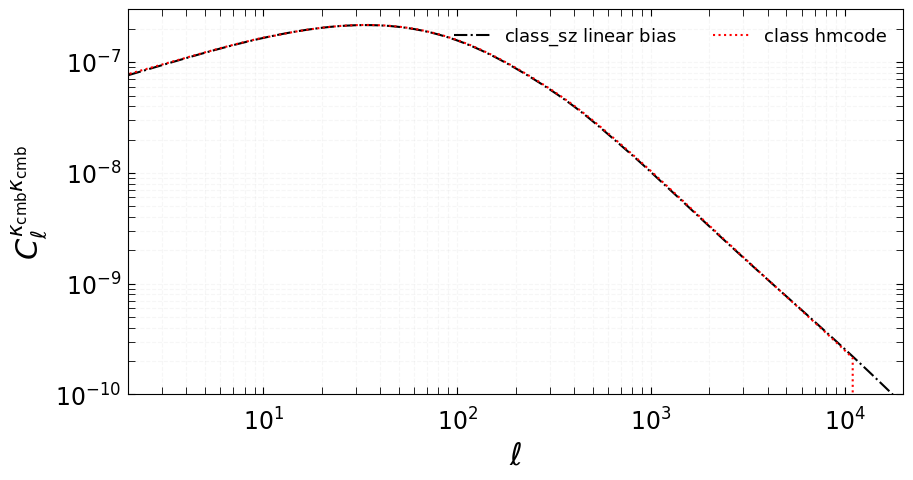

In [37]:
label_size = 17
title_size = 22
legend_size = 13
handle_length = 1.5
fig, (ax3) = plt.subplots(1,1,figsize=(10,5))

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( which="both", alpha=0.1, linestyle='--')

ax.set_ylabel(r"$C_\ell^{\kappa_\mathrm{cmb}\kappa_\mathrm{cmb}}$",size=title_size)
ax.set_xlabel(r"$\ell$",size=title_size)

ell = np.asarray(cl_kk_hm()['ell'])
fac = ell*(ell+1.)/2./np.pi

cl_kk_hf = np.asarray(cl_kk_hm()['hf'])/fac


ax.plot(ell,cl_kk_hf,ls='-.',c='k',label=r'class_sz $\mathrm{linear\,\,bias}$')

l_class = cosmo.lensed_cl()['ell']
cl_kk_class = cosmo.lensed_cl()['pp']*(cosmo.lensed_cl()['ell']*(cosmo.lensed_cl()['ell']+1.)/2.)**2.
_, = ax.plot(l_class,
                     cl_kk_class,
                     ls=':',c='r',label=r'class hmcode')


plt.legend(frameon=True,framealpha=0,ncol=2,fontsize=13,loc=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(2e0,2.e4)
ax.set_ylim(1e-10,3e-7)

array([1.023204  , 1.01724158, 1.01361301, 1.01246877, 1.01392533,
       1.00979837, 1.00809772, 1.00889847, 1.00637129, 1.00712736,
       1.00573663, 1.0068057 , 1.00558526, 1.00565815, 1.00616569,
       1.00644566, 1.00651075, 0.99716363, 0.99753045, 0.99818287,
       0.99896439, 0.99953962, 0.99990194, 1.00063401, 1.00102417,
       1.00141545, 1.00189935, 1.00216636, 1.00260556, 1.00286357,
       1.00330448, 1.00361159, 1.00406742, 1.00445471, 1.00490548,
       1.00531119, 1.00559805, 1.00629551, 1.00682224, 1.00721335,
       1.00799779, 1.00874713, 1.00945144, 1.01042676, 1.01132661,
       1.01216381, 1.0128567 , 1.01335316, 1.01366882, 1.01414532,
       1.0143559 , 1.01485084, 1.01554319, 1.01630156, 1.01722325,
       1.01856847, 1.02014444, 1.02115897, 1.02158921, 1.02126155,
       1.02077287, 1.02069105, 1.02145763, 1.02260512, 1.02210852,
       1.02029503, 1.01990534, 1.01994121, 1.01842577, 1.01696384,
       1.01608158, 1.01418374, 1.01253667, 1.01038348, 1.00818

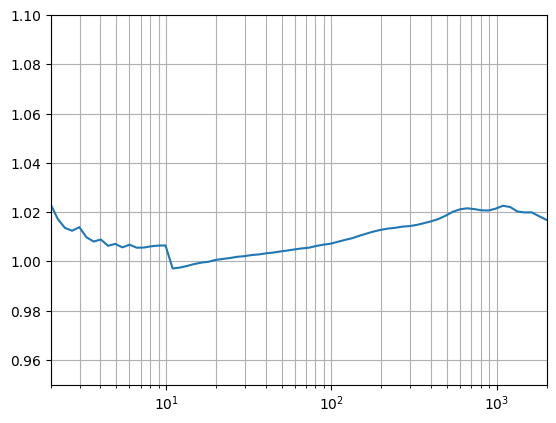

In [38]:
r = np.interp(ell,l_class,cl_kk_class)/cl_kk_hf
plt.plot(ell,r)
plt.xscale('log')
plt.ylim(0.95,1.10)
plt.xlim(2,2e3)
plt.grid(which='both')
r